# Importing the main libraries
** Other imports added as required **

In [1]:
from pathlib import Path as path
import tarfile
import urllib

import matplotlib.pyplot as plt
import seaborn as sns

# Defining main environment variables and locations

In [2]:
CHAPTER_ID = 'end_to_end_project'
PROJECT_ROOT_DIR = '.'
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = path("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
IMAGES_PATH = path(PROJECT_ROOT_DIR,'images',CHAPTER_ID)

# Preparing graph functions and settings

In [3]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks

plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300, overwrite=False):
    path_ = path(IMAGES_PATH, f'{fig_id}.{fig_extension}')
    if path_.exists() and not overwrite:
        print(f'{fig_id}.{fig_extension} already exists in {IMAGES_PATH}')
    else:
        print(f'Saving figure {fig_id} in {IMAGES_PATH}')
        if tight_layout:
            plt.tight_layout()
        plt.savefig(path_, format=fig_extension, dpi=resolution)

In [4]:
IMAGES_PATH.mkdir(parents=True,exist_ok=True)

In [5]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    path.mkdir(housing_path, exist_ok=True, parents=True)
    tgz_path = path(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [6]:
# Check if data is already available before downloading again
if path(HOUSING_PATH,'housing.csv').exists():
    print('Data is already downloaded')
else:
    fetch_housing_data()

Data is already downloaded


In [7]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    housing_csv = path(housing_path,"housing.csv")
    return pd.read_csv(housing_csv)

In [8]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Data consists of 10 columns - 9 numerical and 1 categorical

In [10]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


attribute_histogram_plots.png already exists in images/end_to_end_project


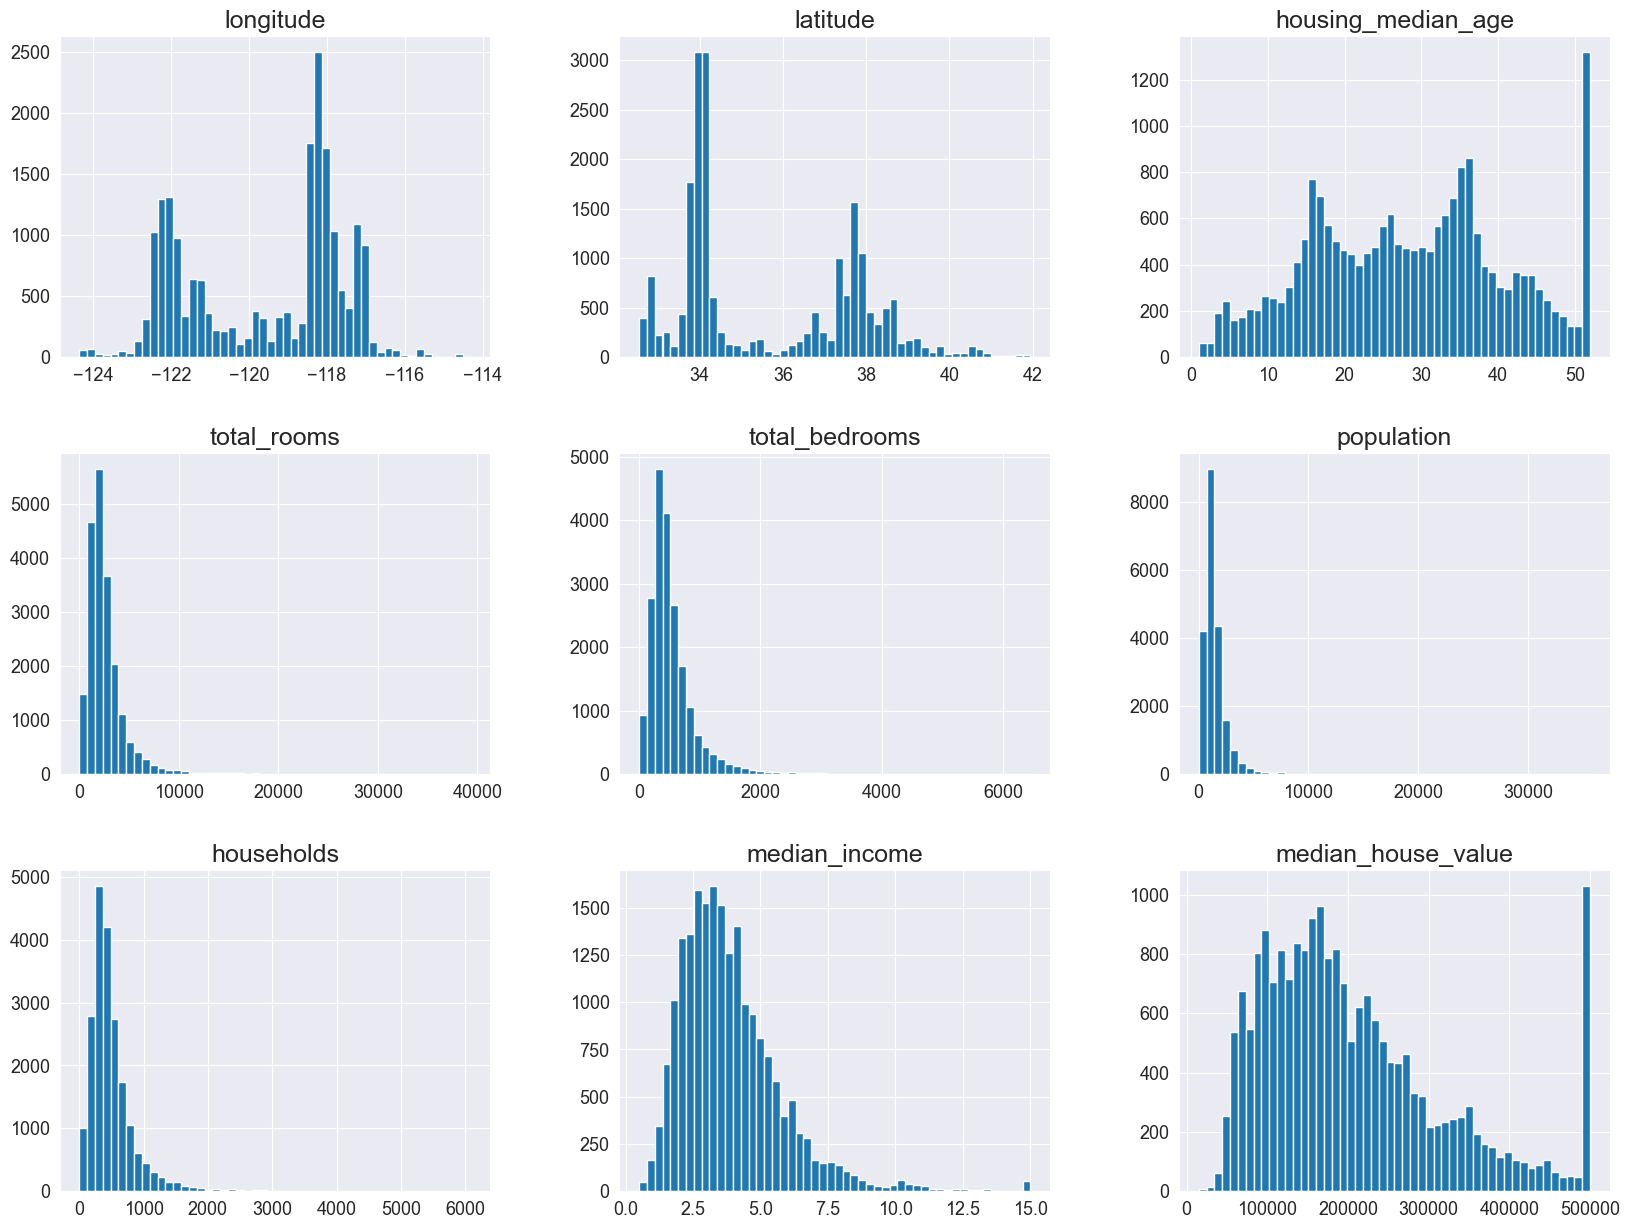

In [12]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Creating an income category attribute

In [13]:
import numpy as np

housing["income_cat"] = pd.cut(housing['median_income'],
                                bins=[0.,1.5,3.,4.5,6.,np.inf],
                                labels=[1,2,3,4,5])

<AxesSubplot: >

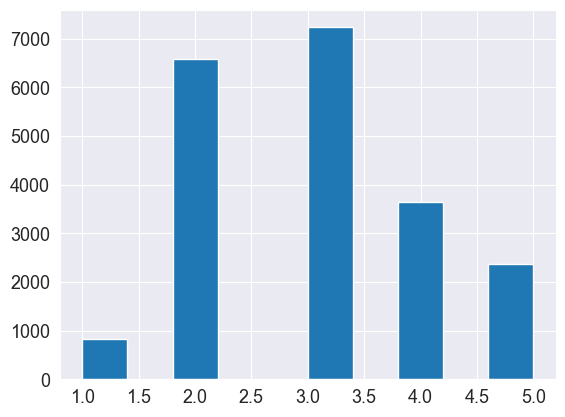

In [14]:
housing["income_cat"].hist()

In [15]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
stratified = strat_test_set["income_cat"].value_counts()/len(strat_test_set)
stratified

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

## Comparing to original housing data

In [18]:
original = housing["income_cat"].value_counts()/len(housing)
original

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

### Random vs Stratified vs Original

In [19]:
from sklearn.model_selection import train_test_split

random_test_set, random_train_set = train_test_split(housing,test_size=0.2, random_state=42)

In [20]:
random = random_test_set["income_cat"].value_counts()/len(housing)
random

income_cat
3    0.278876
2    0.253973
4    0.142829
5    0.092539
1    0.031783
Name: count, dtype: float64

In [21]:
columns=["Random","Original","Stratified"]
summary = pd.DataFrame({"Original":original,"Random":random,"Stratified":stratified})

In [22]:
summary

,Original,Random,Stratified
income_cat,,,
3,0.350581,0.278876,0.350533
2,0.318847,0.253973,0.318798
4,0.176308,0.142829,0.176357
5,0.114438,0.092539,0.114341
1,0.039826,0.031783,0.039971


In [23]:
summary["Rand. % error"]=((summary.Original-summary.Random)/summary.Original)*100
summary

,Original,Random,Stratified,Rand. % error
income_cat,,,,
3,0.350581,0.278876,0.350533,20.453289
2,0.318847,0.253973,0.318798,20.346452
4,0.176308,0.142829,0.176357,18.988733
5,0.114438,0.092539,0.114341,19.136325
1,0.039826,0.031783,0.039971,20.194647


In [24]:
summary["Strat. % error"]=((summary.Original-summary.Stratified)/summary.Original)*100
summary.sort_index(axis=0)

,Original,Random,Stratified,Rand. % error,Strat. % error
income_cat,,,,,
1,0.039826,0.031783,0.039971,20.194647,-0.364964
2,0.318847,0.253973,0.318798,20.346452,0.015195
3,0.350581,0.278876,0.350533,20.453289,0.013820
4,0.176308,0.142829,0.176357,18.988733,-0.027480
5,0.114438,0.092539,0.114341,19.136325,0.084674


### Delete dataframes and series created to compare test/train splits

In [25]:
del random, original, stratified, summary

### Remove the income_cat attribute so that the data goes back to its original format

In [26]:
# remove
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Data Visualisation

In [27]:
housing = strat_train_set.copy()

bad_visualisation_plot.png already exists in images/end_to_end_project


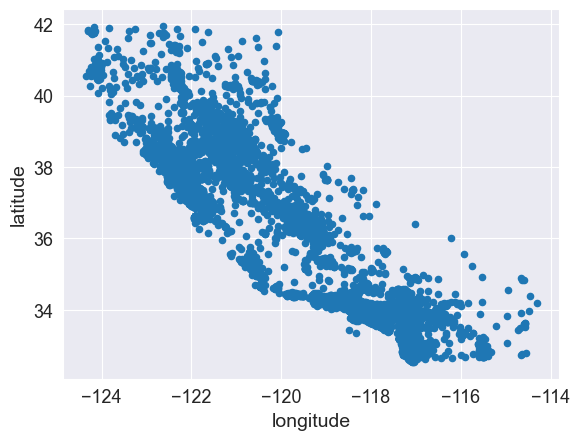

In [28]:
housing.plot(kind='scatter',x='longitude',y='latitude')
save_fig('bad_visualisation_plot')

better_visualisation_plot.png already exists in images/end_to_end_project


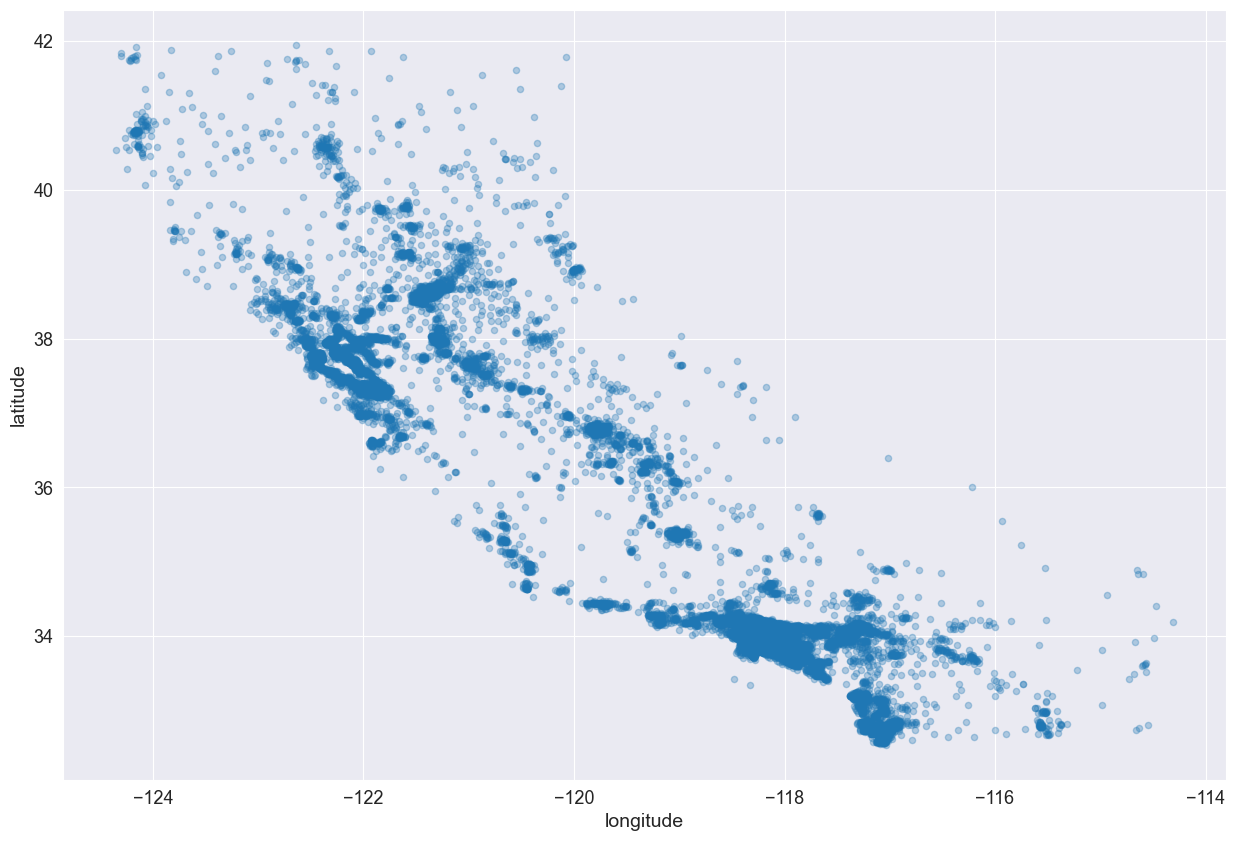

In [29]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.3,figsize=(15,10))
save_fig('better_visualisation_plot')

housing_prices_scatterplot.png already exists in images/end_to_end_project


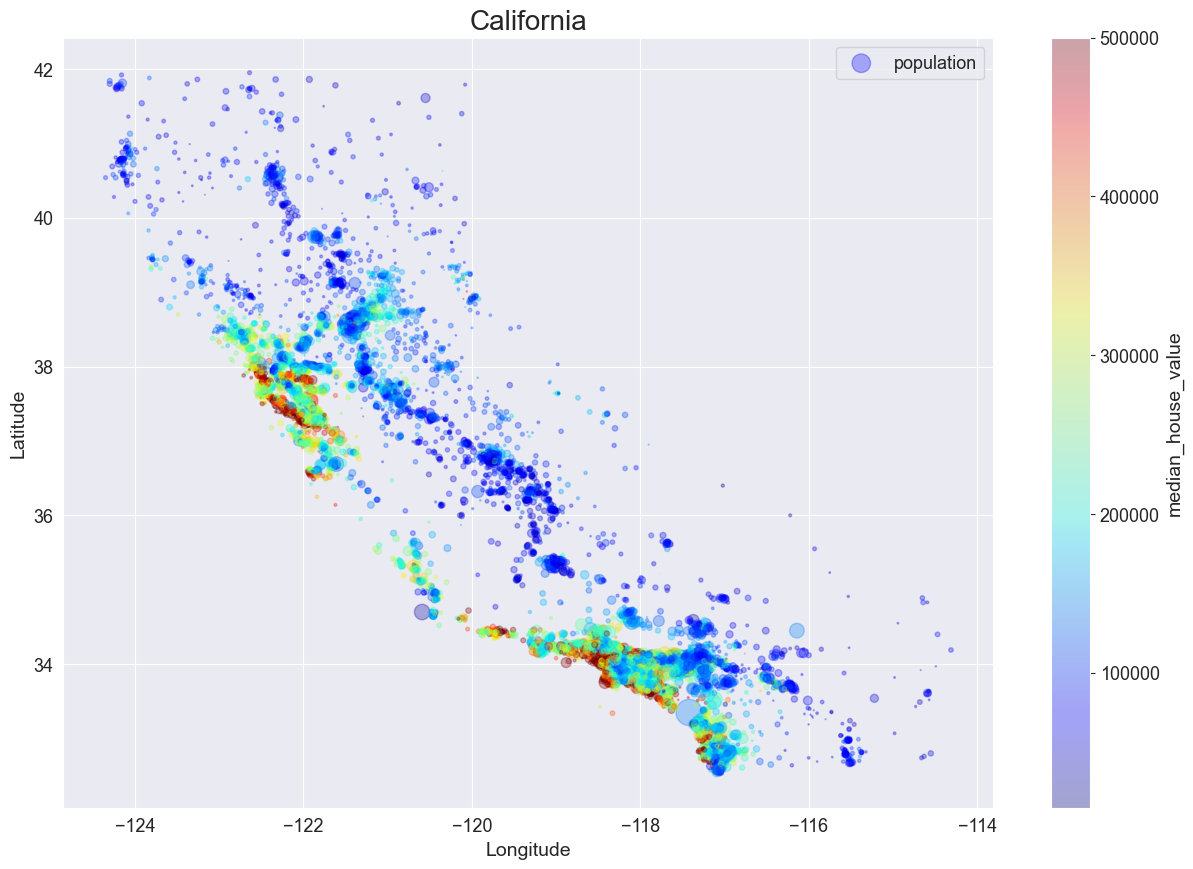

In [30]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
            s=housing['population']/100, label='population', figsize=(15,10),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California', size=20)
plt.legend()
save_fig('housing_prices_scatterplot')

### Code from github notebook - Adding Californian image

In [31]:
# Download the california image
images_path = path(PROJECT_ROOT_DIR,'images',CHAPTER_ID)
images_path.mkdir(exist_ok=True)
filename = 'california.png'
print(f'Downloading {filename}')
url = DOWNLOAD_ROOT + 'images/end_to_end_project/' + filename
urllib.request.urlretrieve(url,path(images_path,filename))

(PosixPath('images/end_to_end_project/california.png'),
 <http.client.HTTPMessage at 0x16ca42740>)

california_housing_prices_plot.png already exists in images/end_to_end_project


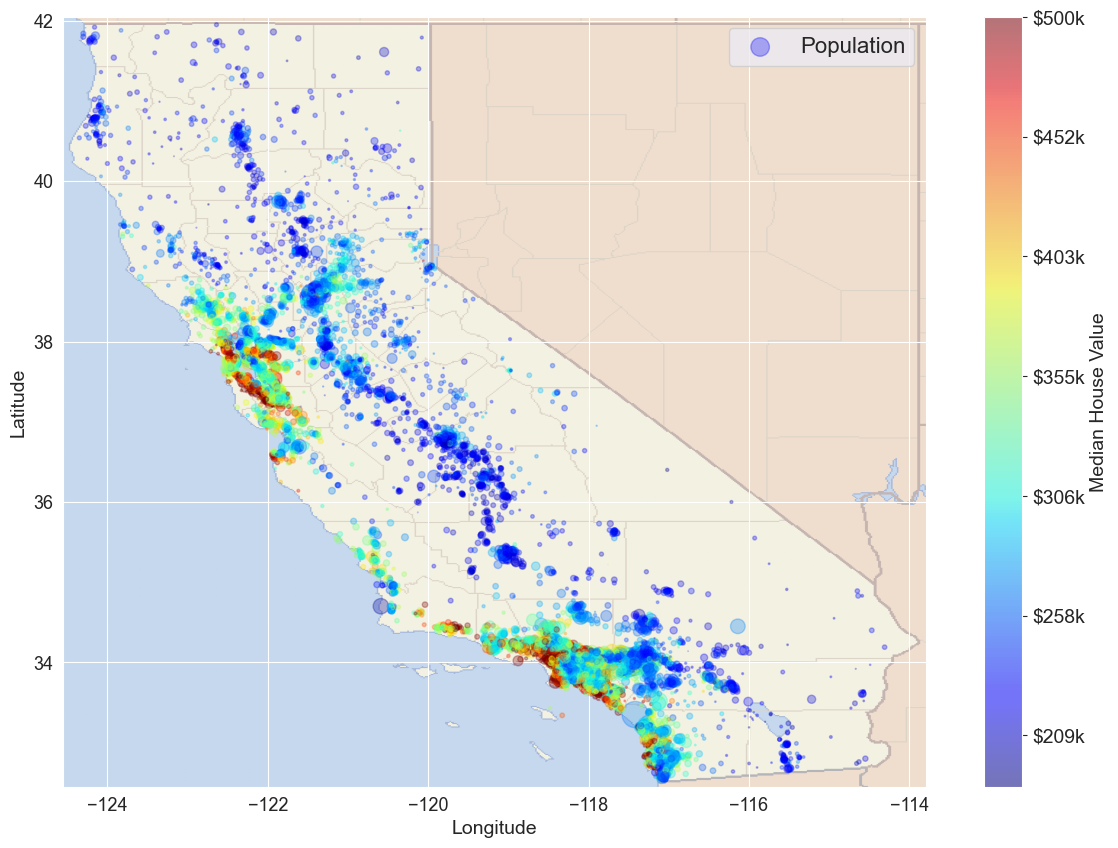

In [32]:
import matplotlib.image as mpigm
california_img = mpigm.imread(path(images_path,filename))
ax = housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.3,
                    s=housing['population']/100, label='Population',
                    figsize=(15,10), c='median_house_value', cmap=plt.get_cmap('jet'),
                    colorbar=False)#, sharex=False)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(),prices.max(),11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels([f"${round(v/1000)}k" for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=14)

plt.legend(fontsize=16)
save_fig('california_housing_prices_plot')
plt.show()

# Looking for correlations

In [33]:
corr_matrix = housing.corr(numeric_only=True)

### Check the correlation between our tagret and the other features

In [34]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

### Use Pandas scatter matrix to visualise the most promising attributes

scatter_matrix_promising_features.png already exists in images/end_to_end_project


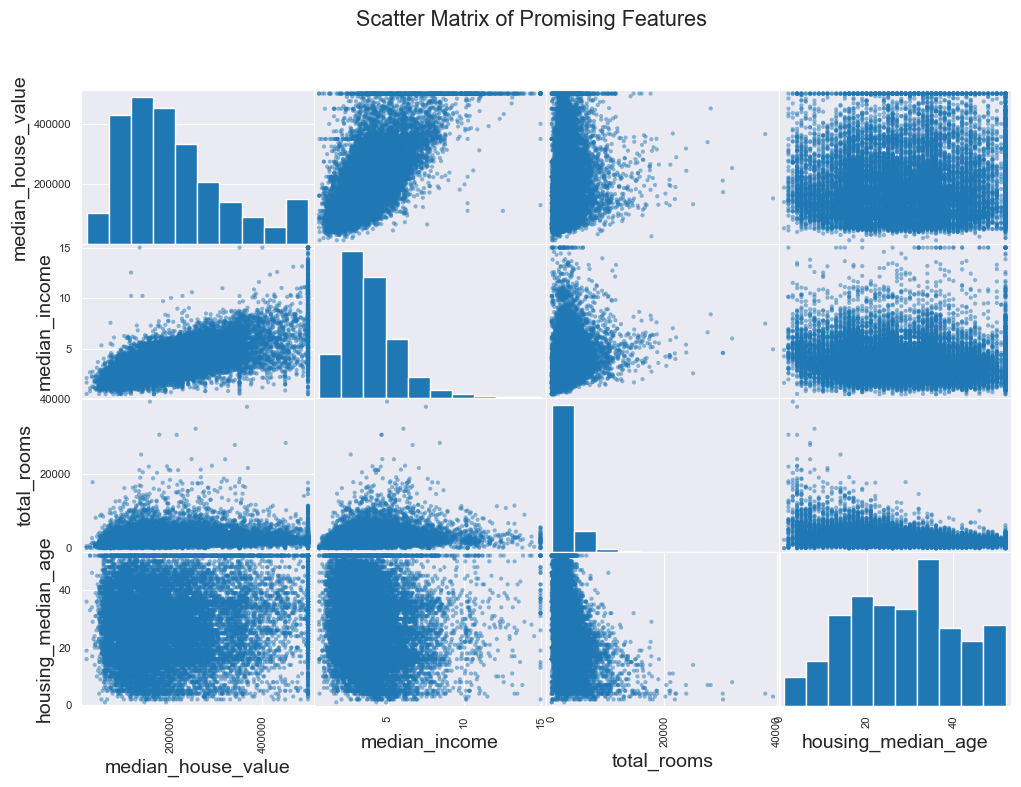

In [35]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8), diagonal='hist')
plt.suptitle('Scatter Matrix of Promising Features')

save_fig('scatter_matrix_promising_features')

income_vs_house_value_scatterplot.png already exists in images/end_to_end_project


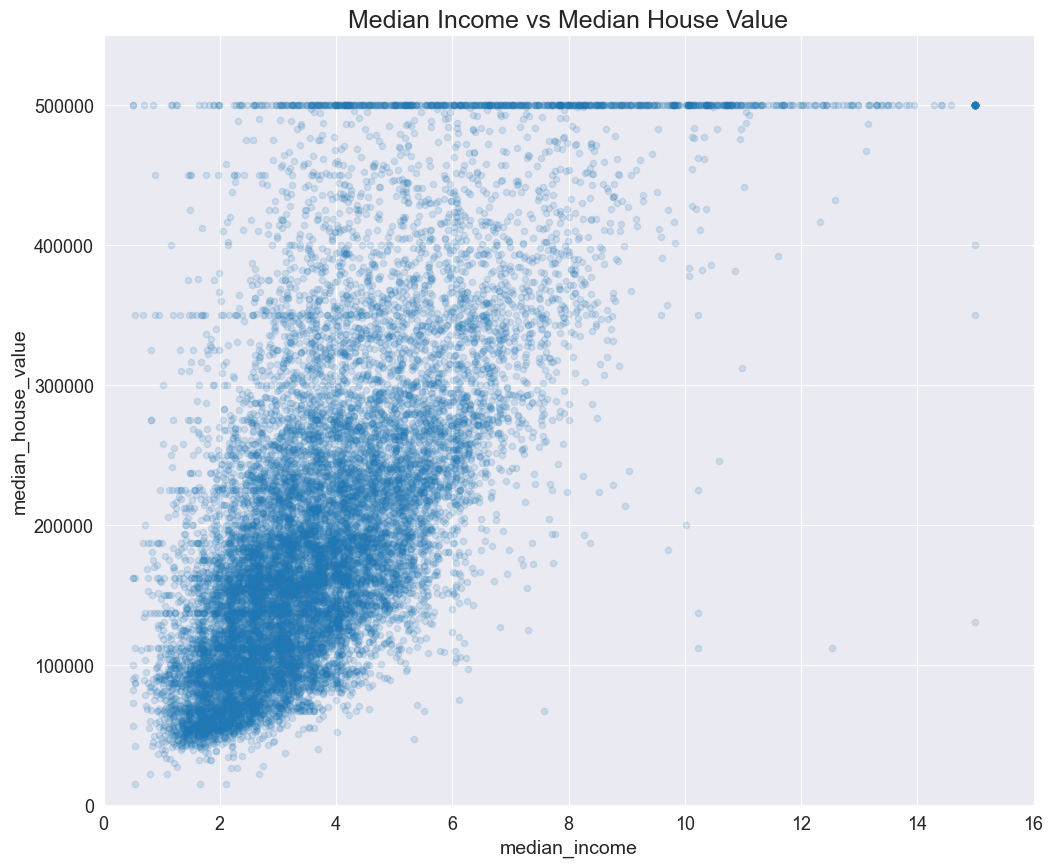

In [36]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.15,figsize=(12,10))
plt.axis([0,16,0,550000])
plt.title('Median Income vs Median House Value')
save_fig('income_vs_house_value_scatterplot')

### Experimenting with Attribute Combinations

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
housing['rooms_per_household'] = (housing.total_rooms)/(housing.households)
housing['bedrooms_per_room'] = (housing.total_bedrooms)/(housing.total_rooms)
housing['population_per_household'] = (housing.population)/(housing.households)

In [39]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

scatter_bedrooms_per_room_vs_median_house_value.png already exists in images/end_to_end_project


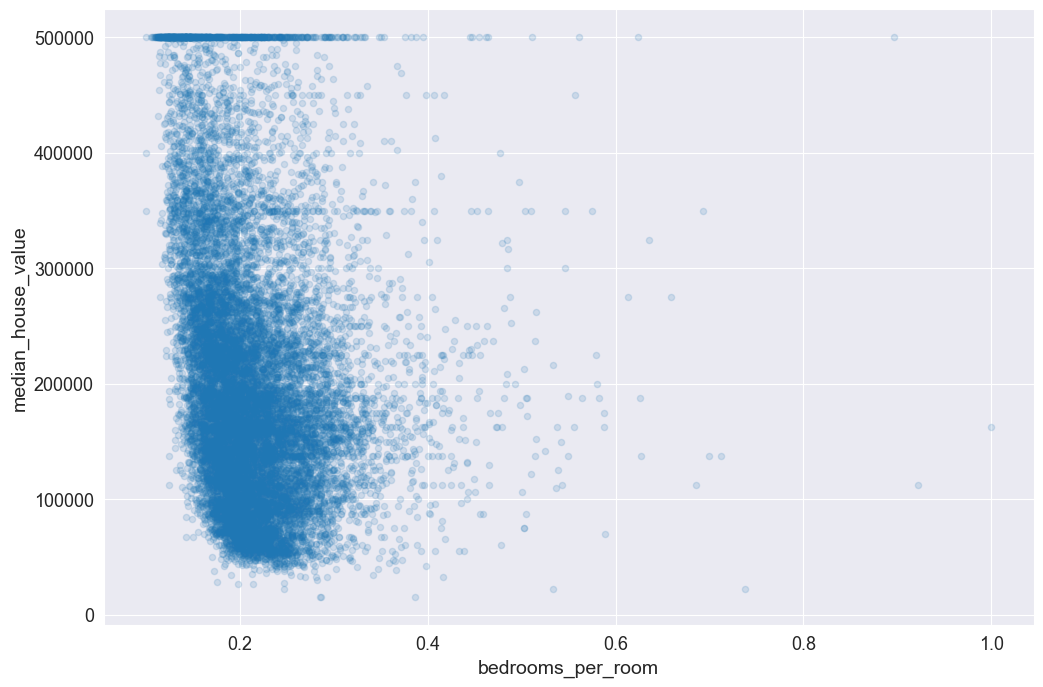

In [40]:
housing.plot(kind='scatter', y='median_house_value', x='bedrooms_per_room',alpha=0.15,figsize=(12,8))
save_fig('scatter_bedrooms_per_room_vs_median_house_value')

scatter_population_per_household_vs_median_house_value.png already exists in images/end_to_end_project


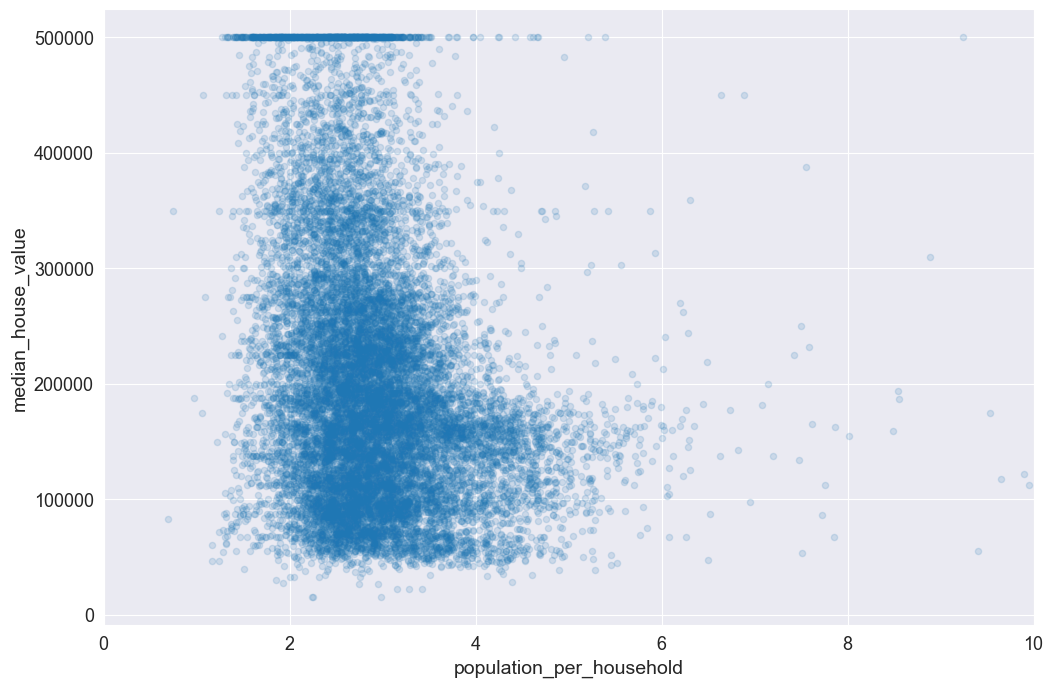

In [41]:
housing.plot(kind='scatter', y='median_house_value', x='population_per_household',alpha=0.15,figsize=(12,8))
plt.xlim((0,10))
save_fig('scatter_population_per_household_vs_median_house_value')

scatter_rooms_per_household_vs_median_house_value.png already exists in images/end_to_end_project


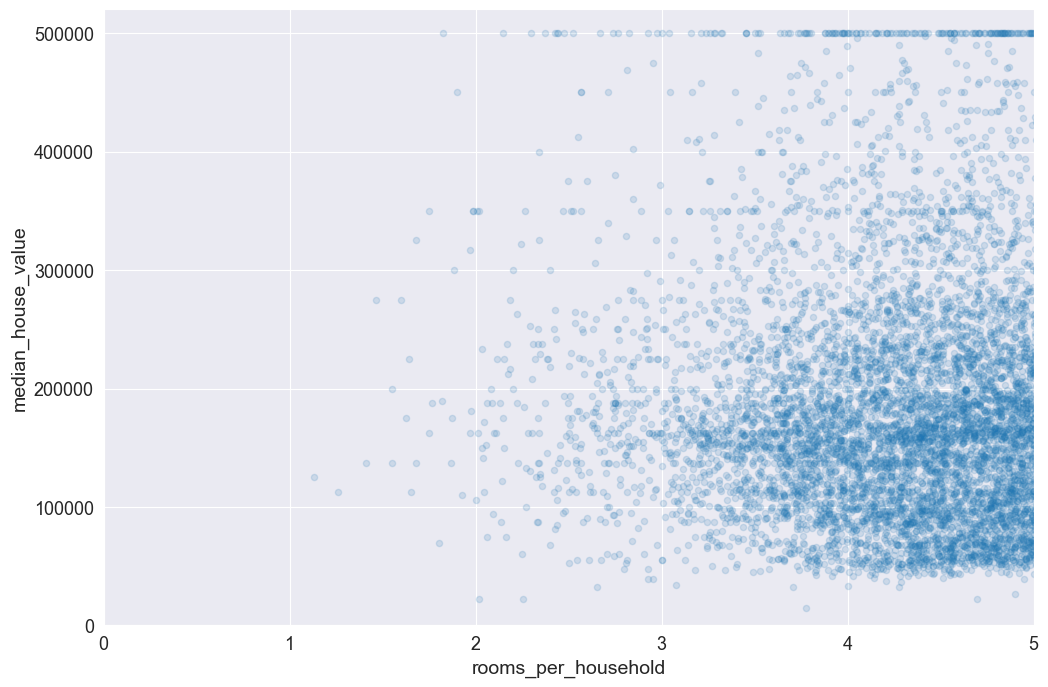

In [42]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.15, figsize=(12,8))
plt.axis([0, 5, 0, 520000])
save_fig('scatter_rooms_per_household_vs_median_house_value')

In [43]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# Prepare the Data for Machine Learning Algorithms

In [44]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

#### Dealing with Missing Values

Exploring the 3 options from the book

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does

In [45]:
sample_incoplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incoplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


Method #1 Get rid of districts that have missing values

In [46]:
sample_incoplete_rows.dropna(subset='total_bedrooms')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


Method #2 Drop the whole column/attribute with missing values

In [47]:
sample_incoplete_rows.drop('total_bedrooms', axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


Method #3 Fill missing values with either median or mean of the districts that have data

In [48]:
median = housing['total_bedrooms'].median()
sample_incoplete_rows['total_bedrooms'].fillna(median,inplace=True)
sample_incoplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


The scikit-learn method - The SimpleImputer

In [49]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [50]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [51]:
housing_num = housing.drop('ocean_proximity',axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [53]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Transform the training set

In [54]:
X = imputer.transform(housing_num)

In [55]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index)

In [56]:
housing_tr.loc[sample_incoplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [57]:
imputer.strategy

'median'

In [58]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [59]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


# Handling Text and Categorical Attributes

In [60]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Ordinal Encoding

In [61]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [62]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One-Hot Encoding

In [63]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=True) # default, can set to False to get .toarray() output as shown below
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [64]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [65]:
cat_encoder.categories_ 

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/X[:,households_ix]
        population_per_household = X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

Could get column indices dynamically istead of typing them manually as above

In [67]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

print(rooms_ix, bedrooms_ix, population_ix, households_ix)

3 4 5 6


In [68]:

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

In [69]:
housing.values

array([[-121.46, 38.52, 29.0, ..., 706.0, 2.1736, 'INLAND'],
       [-117.23, 33.09, 7.0, ..., 768.0, 6.3373, 'NEAR OCEAN'],
       [-119.04, 35.37, 44.0, ..., 300.0, 2.875, 'INLAND'],
       ...,
       [-122.72, 38.44, 48.0, ..., 172.0, 3.1797, '<1H OCEAN'],
       [-122.7, 38.31, 14.0, ..., 501.0, 4.1964, '<1H OCEAN'],
       [-122.14, 39.97, 27.0, ..., 197.0, 3.1319, 'INLAND']], dtype=object)

In [70]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [71]:
housing_extra_attribs

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        3.168555240793201],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        2.6236979166666665],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        2.223333333333333],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        2.6627906976744184],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        2.411177644710579],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        3.1725888324873095]], dtype=object)

In [72]:
# just checking what housing looks like for comparison
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [73]:
housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs,\
    index=housing.index,
    columns=housing.columns.to_list()+['rooms_per_household','population_per_household'])

In [74]:
housing_extra_attribs_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


### Transformation Pipelines

Pipeline for transforming numerical attributes

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [76]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [77]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [78]:
housing['ocean_proximity'].name

'ocean_proximity'

In [79]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

In [80]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
housing_prepared.shape

(16512, 16)

# Select and train a model

### Training and Evaluating on the Training Set

In [82]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [83]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 86208. 304704. 153536. 185728. 244416.]


In [84]:
# Actual values
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [85]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

In [86]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [87]:
housing_predictions = tree_reg.predict(housing_prepared)

In [88]:
tree_mse = mean_squared_error(housing_predictions, housing_labels)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

### Better Evaluation using Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([71896.39454682, 71012.49367221, 68247.38609608, 71854.56951078,
       71443.00796833, 78855.56375967, 71912.76465085, 73958.36579637,
       68299.16227135, 72281.14769574])

In [90]:
def display_scores(scores):
    print("Scores:", scores,'\n')
    print("Mean:", scores.mean(),'\n')
    print("Standard deviation:", scores.std(),'\n')

display_scores(tree_rmse_scores)

Scores: [71896.39454682 71012.49367221 68247.38609608 71854.56951078
 71443.00796833 78855.56375967 71912.76465085 73958.36579637
 68299.16227135 72281.14769574] 

Mean: 71976.08559681912 

Standard deviation: 2828.6125590997717 



In [91]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458] 

Mean: 69116.4347200802 

Standard deviation: 2880.6588594759014 



In [92]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18717.818775955962

In [93]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([51502.2520816 , 48667.74299553, 47132.23773767, 51937.63451324,
       47177.15334728, 51906.98325122, 52033.47393481, 49779.96013172,
       48502.25027512, 53793.88592655])

In [94]:
display_scores(forest_rmse_scores)

Scores: [51502.2520816  48667.74299553 47132.23773767 51937.63451324
 47177.15334728 51906.98325122 52033.47393481 49779.96013172
 48502.25027512 53793.88592655] 

Mean: 50243.357419473396 

Standard deviation: 2187.3096808889636 



# Fine Tune the Model

### Grid Search

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                            scoring="neg_mean_squared_error", 
                            return_train_score= True, n_jobs=6)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=6,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [97]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [98]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

62984.03056459192 {'max_features': 2, 'n_estimators': 3}
55166.35024986354 {'max_features': 2, 'n_estimators': 10}
52330.61215657546 {'max_features': 2, 'n_estimators': 30}
59795.07642666906 {'max_features': 4, 'n_estimators': 3}
52129.967439636435 {'max_features': 4, 'n_estimators': 10}
50400.97767292225 {'max_features': 4, 'n_estimators': 30}
58172.362935548656 {'max_features': 6, 'n_estimators': 3}
51936.956111282256 {'max_features': 6, 'n_estimators': 10}
49581.186749336266 {'max_features': 6, 'n_estimators': 30}
58298.47574895344 {'max_features': 8, 'n_estimators': 3}
52156.591106990294 {'max_features': 8, 'n_estimators': 10}
50022.05611725595 {'max_features': 8, 'n_estimators': 30}
61253.57335819097 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53741.0121887958 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59304.35315194798 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52206.703417331475 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [99]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.045346,0.001458,0.001415,0.000042,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.854066e+09,-3.786965e+09,...,-1.118362e+09,-1.112860e+09,-1.076274e+09,-1.178764e+09,-1.123055e+09,-9.999083e+08,-1.103639e+09,-1.052480e+09,-1.090181e+09,4.598924e+07
1,0.173565,0.026120,0.004541,0.001171,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.408531e+09,-2.809812e+09,...,-5.615036e+08,-5.721288e+08,-5.532230e+08,-5.713880e+08,-5.484345e+08,-5.887831e+08,-5.672940e+08,-5.957567e+08,-5.760321e+08,2.274289e+07
2,0.428235,0.013417,0.012156,0.000462,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.810123e+09,-2.593545e+09,...,-4.381842e+08,-4.292000e+08,-4.364331e+08,-4.258533e+08,-4.108031e+08,-4.174908e+08,-4.332128e+08,-4.122363e+08,-4.240321e+08,1.089425e+07
3,0.074528,0.003710,0.001334,0.000049,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.614831e+09,-3.512613e+09,...,-9.297933e+08,-9.084729e+08,-9.482712e+08,-9.774759e+08,-9.434048e+08,-9.505949e+08,-9.310133e+08,-8.951392e+08,-9.301833e+08,2.402362e+07
4,0.243213,0.005214,0.004093,0.000431,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.854727e+09,-2.685573e+09,...,-5.049880e+08,-5.018373e+08,-5.081742e+08,-4.952228e+08,-4.907161e+08,-5.165625e+08,-4.937997e+08,-5.168473e+08,-5.067781e+08,1.078052e+07
5,0.768796,0.020990,0.013039,0.001032,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.729405e+09,-2.309889e+09,...,-3.915769e+08,-3.778881e+08,-3.901318e+08,-3.825590e+08,-3.910648e+08,-4.008644e+08,-3.909170e+08,-3.915718e+08,-3.899309e+08,5.947386e+06
6,0.109837,0.007977,0.001838,0.000570,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.639816e+09,-3.412669e+09,...,-9.323804e+08,-9.595848e+08,-9.048118e+08,-8.878504e+08,-8.999201e+08,-9.274672e+08,-9.155715e+08,-8.651374e+08,-9.102311e+08,2.559431e+07
7,0.346216,0.007035,0.004453,0.000884,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.908678e+09,-2.606767e+09,...,-5.165132e+08,-5.052769e+08,-5.033796e+08,-4.934642e+08,-4.986421e+08,-4.832624e+08,-4.944706e+08,-4.862893e+08,-4.979932e+08,1.004901e+07
8,1.031595,0.024407,0.011824,0.000596,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.549415e+09,-2.368942e+09,...,-3.724593e+08,-3.716735e+08,-3.818814e+08,-3.938198e+08,-3.752090e+08,-3.865796e+08,-3.848849e+08,-3.726796e+08,-3.796858e+08,6.872184e+06
9,0.131603,0.002009,0.001351,0.000066,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.582710e+09,-3.222898e+09,...,-8.919665e+08,-8.707608e+08,-8.640812e+08,-9.003574e+08,-8.784874e+08,-8.559810e+08,-9.145282e+08,-8.759617e+08,-8.785473e+08,1.749256e+07


### Randomised Search

Not from the book - Following the notebook on github

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=25, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=6)
rnd_search.fit(housing_prepared, housing_labels)

/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=25, n_jobs=6,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29f83cb50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x29f83e410>},
                   random_state=42, scoring='neg_mean_squared_error')

In [101]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}
49488.37168451525 {'max_features': 4, 'n_estimators': 158}
49304.50722820199 {'max_features': 6, 'n_estimators': 130}
50556.532150430045 {'max_features': 4, 'n_estimators': 21}
54449.10975813157 {'max_features': 1, 'n_estimators': 58}
49375.34732138837 {'max_features': 6, 'n_estimators': 89}
54450.30065647209 {'max_features': 1, 'n_estimators': 59}
49097.89865126994 {'max_features': 7, 'n_estimators': 170}
49451.2

In [102]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=190, random_state=42)

### Analyse the best models and their errors

In [103]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.41171902e-02, 7.13874605e-02, 4.66174919e-02, 1.88583434e-02,
       1.73857644e-02, 1.86789659e-02, 1.68088387e-02, 2.98204358e-01,
       6.98788481e-02, 1.09513206e-01, 9.79582514e-02, 1.21826057e-02,
       1.41648288e-01, 6.79822725e-05, 2.49187144e-03, 4.20053430e-03])

In [104]:
list(cat_encoder.categories_[0])

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [105]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.29820435794878786, 'median_income'),
 (0.14164828789292708, 'INLAND'),
 (0.10951320584402652, 'pop_per_hhold'),
 (0.09795825141289147, 'bedrooms_per_room'),
 (0.07411719024595508, 'longitude'),
 (0.07138746052146154, 'latitude'),
 (0.069878848142857, 'rooms_per_hhold'),
 (0.046617491863047436, 'housing_median_age'),
 (0.01885834344551041, 'total_rooms'),
 (0.01867896588664085, 'population'),
 (0.01738576439565025, 'total_bedrooms'),
 (0.01680883867062005, 'households'),
 (0.012182605723488048, '<1H OCEAN'),
 (0.004200534297827639, 'NEAR OCEAN'),
 (0.0024918714357977, 'NEAR BAY'),
 (6.79822725111255e-05, 'ISLAND')]

# Evaluate on the Test Set

In [106]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [107]:
final_rmse

47686.51524168085

Compute a 95% confidence interval for the test RMSE

In [108]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45732.65939333, 49563.4072336 ])

# Model peristence using joblib

In [109]:
import joblib

joblib.dump(final_model,"housing_final_model.pkl")

['housing_final_model.pkl']

In [110]:
my_model_loaded = joblib.load("housing_final_model.pkl")

In [111]:
final_model.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [112]:
my_model_loaded.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [113]:
final_predictions = my_model_loaded.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [114]:
final_rmse

47686.51524168085

# Extra Material

## 1. Try using SVR

Support Vector Machine Regressor with various hyperpearameters for 'kernel', 'gamma' and 'C'.

In [115]:
from sklearn.svm import SVR

In [116]:
# from github notebook

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=6)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=10.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   3.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   3.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   3.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ..............................C=30.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   3.2s
[CV] END ..............................C=30.0, kernel=linear; total time=   3.3s
[CV] END .............................C=100.0, kernel=linear; total time=   3.2s
[CV] END .............................C=100.0, kernel=linear; total time=   3.2s
[CV] END .............................C=100.0, kernel=linear; total time=   3.1s
[CV] END .............................C=100.0, kernel=linear; total time=   3.2s
[CV] END .............................C=100.0, kernel=linear; total time=   3.2s
[CV] END .............................C=300.0, kernel=linear; total time=   3.2s
[CV] END .............................C=300.0, kernel=linear; total time=   3.2s
[CV] END .............................C=300.0, kernel=linear; total time=   3.2s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVR(), n_jobs=6,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [117]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [118]:
print(grid_search.best_estimator_,np.sqrt(-grid_search.best_score_),sep='\n')

SVR(C=30000.0, kernel='linear')
70286.6183527245


In [119]:
cvres_svr = grid_search.cv_results_
for mean_score, params in zip(cvres_svr['mean_test_score'],cvres_svr['params']):
    print(np.sqrt(-mean_score),params)

84649.6069847477 {'C': 10.0, 'kernel': 'linear'}
75457.08963185534 {'C': 30.0, 'kernel': 'linear'}
71635.5536091723 {'C': 100.0, 'kernel': 'linear'}
70677.86808389993 {'C': 300.0, 'kernel': 'linear'}
70396.49757132065 {'C': 1000.0, 'kernel': 'linear'}
70323.59019841412 {'C': 3000.0, 'kernel': 'linear'}
70292.42763594876 {'C': 10000.0, 'kernel': 'linear'}
70286.6183527245 {'C': 30000.0, 'kernel': 'linear'}
118819.34364522224 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
118699.17654811458 {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}
118643.66544284696 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118772.67744039097 {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}
118898.89058474178 {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
118933.05253182865 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
118601.87638476977 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}
118270.77280181898 {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}
118092.00656626429 {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}
118460.8070829649 {'C': 3.0, 'gamma': 

In [120]:
# trying higher values for C as our best parameters were:
# {'C': 30000.0, 'kernel': 'linear'}

# from github notebook

param_grid = [
        {'kernel': ['linear'], 'C': [20000., 30000.0,40000., 50000., 60000., 70000., 800000., 90000., 100000.]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=6)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=20000.0, kernel=linear; total time=   5.5s
[CV] END ...........................C=20000.0, kernel=linear; total time=   5.9s
[CV] END ...........................C=20000.0, kernel=linear; total time=   6.1s
[CV] END ...........................C=20000.0, kernel=linear; total time=   6.1s
[CV] END ...........................C=20000.0, kernel=linear; total time=   6.1s
[CV] END ...........................C=30000.0, kernel=linear; total time=   6.8s
[CV] END ...........................C=30000.0, kernel=linear; total time=   6.3s
[CV] END ...........................C=30000.0, kernel=linear; total time=   6.0s
[CV] END ...........................C=30000.0, kernel=linear; total time=   6.3s
[CV] END ...........................C=30000.0, kernel=linear; total time=   6.7s
[CV] END ...........................C=40000.0, kernel=linear; total time=   7.3s
[CV] END ...........................C=40000.0, ke

/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...........................C=90000.0, kernel=linear; total time=  12.9s
[CV] END ..........................C=800000.0, kernel=linear; total time= 1.1min
[CV] END ..........................C=800000.0, kernel=linear; total time= 1.1min
[CV] END ..........................C=800000.0, kernel=linear; total time= 1.1min
[CV] END ..........................C=800000.0, kernel=linear; total time= 1.1min
[CV] END ..........................C=800000.0, kernel=linear; total time= 1.1min
[CV] END ...........................C=90000.0, kernel=linear; total time=  13.4s
[CV] END ..........................C=100000.0, kernel=linear; total time=  11.0s
[CV] END ..........................C=100000.0, kernel=linear; total time=  12.5s
[CV] END ..........................C=100000.0, kernel=linear; total time=  13.4s
[CV] END ..........................C=100000.0, kernel=linear; total time=  14.1s
[CV] END ..........................C=100000.0, kernel=linear; total time=  14.4s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=6,
             param_grid=[{'C': [20000.0, 30000.0, 40000.0, 50000.0, 60000.0,
                                70000.0, 800000.0, 90000.0, 100000.0],
                          'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [121]:
print(grid_search.best_estimator_,np.sqrt(-grid_search.best_score_),sep='\n')

SVR(C=90000.0, kernel='linear')
70284.99990284602


In [122]:
cvres_svr = grid_search.cv_results_
for mean_score, params in zip(cvres_svr['mean_test_score'],cvres_svr['params']):
    print(np.sqrt(-mean_score),params)

70288.39726857515 {'C': 20000.0, 'kernel': 'linear'}
70286.6183527245 {'C': 30000.0, 'kernel': 'linear'}
70287.84837898036 {'C': 40000.0, 'kernel': 'linear'}
70285.6386549034 {'C': 50000.0, 'kernel': 'linear'}
70285.47837344353 {'C': 60000.0, 'kernel': 'linear'}
70285.04448127151 {'C': 70000.0, 'kernel': 'linear'}
70285.09491517673 {'C': 800000.0, 'kernel': 'linear'}
70284.99990284602 {'C': 90000.0, 'kernel': 'linear'}
70285.03986335344 {'C': 100000.0, 'kernel': 'linear'}


It looks like running the SVR model with higher C values does not improve the model by much

Let's try using RandomizedSearchCV instead of GridSearchCV

## 2. Replace GridSearchCV with RandomizedSeachCV

In [123]:
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=629.782329591372, gamma=3.010121430917521, kernel=linear; total time=   2.9s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   5.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   5.1s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   5.2s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   5.3s
[CV] END C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf; total time=   5.2s
[CV] END C=84.14107900575871, gamma=0.059838768608680676, 

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x29f83c0d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x29f86dfc0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [124]:
print(rnd_search.best_estimator_,np.sqrt(-rnd_search.best_score_),sep='\n')

SVR(C=157055.10989448498, gamma=0.26497040005002437)
54751.69009256622


From the github Notebook:

This time the search found a good set of hyperparameters for the RBF kernel. Randomized search tends to find better hyperparameters than grid search in the same amount of time.

Let's look at the exponential distribution we used, with scale=1.0. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

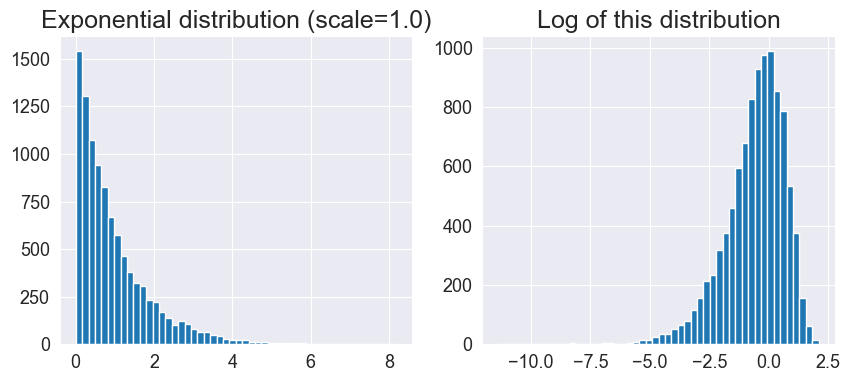

In [125]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

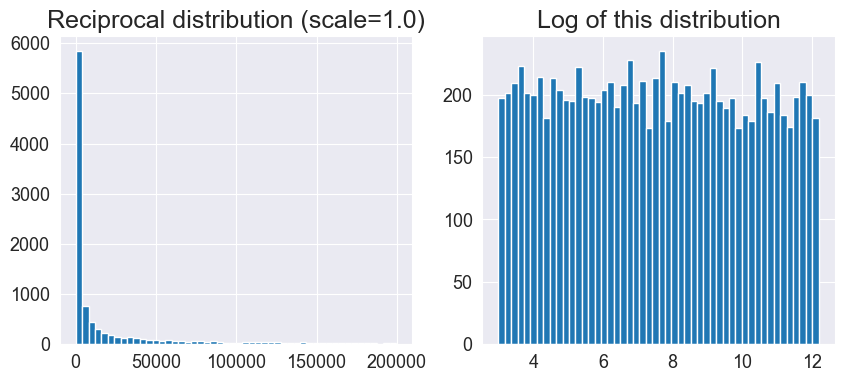

In [126]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

## 3. Transformer in the preparation Pipeling

To select only the most important attributes to use for the model

In [127]:
from sklearn.base import TransformerMixin,BaseEstimator

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self,feature_importances,k) -> None:
        self.feature_importances = feature_importances
        self.k = k
    def fit(self,X,y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self, X):
        return X[:,self.feature_indices_]


Using permutation importance below as feature_importances_ is not available for SVR models

refer to:
https://stackoverflow.com/questions/70467781/feature-importance-with-svr

Feature: 0, Score: 8247068306.94117
Feature: 1, Score: 7891531103.22412
Feature: 2, Score: 1372228619.77694
Feature: 3, Score: 1539311334.67660
Feature: 4, Score: 1717119940.13250
Feature: 5, Score: 5607090245.70449
Feature: 6, Score: 1822410805.54210
Feature: 7, Score: 8101908811.38008
Feature: 8, Score: 736414912.20925
Feature: 9, Score: 68617545.50574
Feature: 10, Score: 950129584.78970
Feature: 11, Score: 404616482.63643
Feature: 12, Score: 468539023.72706
Feature: 13, Score: 1067669.56091
Feature: 14, Score: 155405481.38506
Feature: 15, Score: 210930087.47695


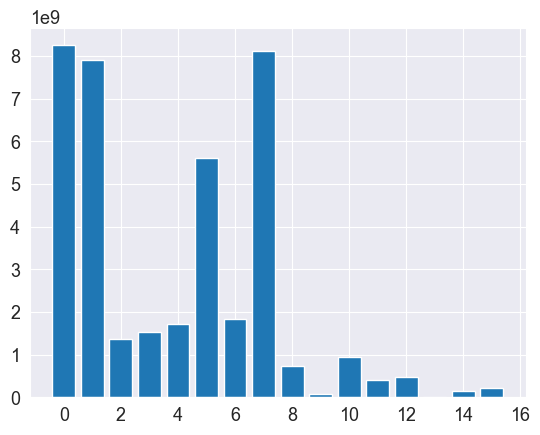

In [132]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(rnd_search.best_estimator_,housing_prepared, housing_labels, scoring='neg_mean_squared_error',n_jobs=6)

feature_importances = importance.importances_mean

# summarize feature importance
for i,v in enumerate(feature_importances):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(feature_importances))], feature_importances)
plt.show() 

In [133]:
# Let's keep the 5 most improtant features
k=5

In [134]:
top_k_feature_indices = indices_of_top_k(feature_importances,k)
top_k_feature_indices

array([0, 1, 5, 6, 7])

In [135]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'population', 'households',
       'median_income'], dtype='<U18')

In [136]:
sorted(zip(feature_importances, attributes), reverse=True)

[(8247068306.941168, 'longitude'),
 (8101908811.380075, 'median_income'),
 (7891531103.224121, 'latitude'),
 (5607090245.7044935, 'population'),
 (1822410805.542096, 'households'),
 (1717119940.132504, 'total_bedrooms'),
 (1539311334.6766021, 'total_rooms'),
 (1372228619.7769396, 'housing_median_age'),
 (950129584.7896996, 'bedrooms_per_room'),
 (736414912.2092539, 'rooms_per_hhold'),
 (468539023.72706354, 'INLAND'),
 (404616482.6364252, '<1H OCEAN'),
 (210930087.4769515, 'NEAR OCEAN'),
 (155405481.38506022, 'NEAR BAY'),
 (68617545.50574017, 'pop_per_hhold'),
 (1067669.5609116554, 'ISLAND')]

In [137]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(8247068306.941168, 'longitude'),
 (8101908811.380075, 'median_income'),
 (7891531103.224121, 'latitude'),
 (5607090245.7044935, 'population'),
 (1822410805.542096, 'households')]

In [138]:
# Create new pipeline that uses the previously created preparation pipieline adding the top k features selection

preparation_and_feature_selection_pipeline = Pipeline([
    ('prepatation', full_pipeline),
    ('feature_selection',TopFeaturesSelector(feature_importances,k))
])

In [139]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [140]:
housing_prepared_top_k_features[0:3]

array([[-0.94135046,  1.34743822,  0.73260236,  0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966,  0.53361152,  0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 , -0.67467519, -0.52440722, -0.52543365]])

In [141]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822,  0.73260236,  0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966,  0.53361152,  0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 , -0.67467519, -0.52440722, -0.52543365]])

Did not work - need to investigate

## 4. Create a single pipeline that does the full data preparation plus the final prediction.

In [142]:
print(rnd_search.best_params_)

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}


In [143]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeaturesSelector(feature_importances,k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [144]:
prepare_select_and_predict_pipeline.fit(housing,housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat', OneHotEncoder(...
                 TopFeaturesSelector(feature_importances=array([8.24706831e+09, 7.89153110e+09, 1.37222862e+09, 1.53931133e+09,
       1.71711994e+09, 5.60709025e+09, 1.82241081e+09, 8.10190881e+09,
       7.36414912e+08, 6.86175455e+07, 9.50129585e+08, 4.04616483e+08,
       4.68539024e+08, 1.06766956e+06, 1.55405481e+08, 2.10930087e+08]),
                                     k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [145]:
some_data = housing.iloc[:4]
some_labels = housing_labels[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t", list(some_labels))

Predictions:	 [ 80721.46170539 306993.14888483 122281.52751439 162057.19507942]
Labels:	 [72100.0, 279600.0, 82700.0, 112500.0]


From GitHub notebook:

Well, the full pipeline seems to work fine. Of course, the predictions are not fantastic: they would be better if we used the best RandomForestRegressor that we found earlier, rather than the best SVR.

## 5. Automatically explore some preparation options using GridSearchCV.

**Note:** In the code below, I've set the OneHotEncoder's handle_unknown hyperparameter to 'ignore', to avoid warnings during training. Without this, the OneHotEncoder would default to handle_unknown='error', meaning that it would raise an error when transforming any data containing a category it didn't see during training. If we kept the default, then the GridSearchCV would run into errors during training when evaluating the folds in which not all the categories are in the training set. This is likely to happen since there's only one sample in the 'ISLAND' category, and it may end up in the test set in some of the folds. So some folds would just be dropped by the GridSearchCV, and it's best to avoid that.

In [146]:
full_pipeline.named_transformers_["cat"].handle_unknown = 'ignore'

param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=2,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   1.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   1.1s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   1.1s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=mean; total time=   3.0s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=median; total time=   3.0s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   1.2s
[CV] END feature_selection__k=1, preparation__num__imputer__strategy=most_frequent; total time=   2.9s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   1.2s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   1.2s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=mean; total time=   3.1s
[CV] END feature_selection__k=2, preparation__num__imputer__strategy=median; total time=   3.0s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   1.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=2, preparation__num__imputer__strategy=most_frequent; total time=   3.1s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   1.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   1.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=mean; total time=   3.3s
[CV] END feature_selection__k=3, preparation__num__imputer__strategy=median; total time=   3.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   1.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=3, preparation__num__imputer__strategy=most_frequent; total time=   3.2s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   1.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   1.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=mean; total time=   3.5s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=median; total time=   3.5s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   1.4s
[CV] END feature_selection__k=4, preparation__num__imputer__strategy=most_frequent; total time=   3.4s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   1.4s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   1.4s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=mean; total time=   3.5s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=median; total time=   3.5s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   1.6s
[CV] END feature_selection__k=5, preparation__num__imputer__strategy=most_frequent; total time=   3.5s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   1.6s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   1.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=mean; total time=   3.7s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=median; total time=   3.6s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   1.6s
[CV] END feature_selection__k=6, preparation__num__imputer__strategy=most_frequent; total time=   3.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   1.6s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=mean; total time=   3.8s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   1.7s
[CV] END feature_selection__k=7, preparation__num__imputer__strategy=median; total time=   3.8s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   1.9s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=7, preparation__num__imputer__strategy=most_frequent; total time=   3.8s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   2.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=mean; total time=   4.6s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   2.2s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=median; total time=   4.2s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   2.3s
[CV] END feature_selection__k=8, preparation__num__imputer__strategy=most_frequent; total time=   4.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   2.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=mean; total time=   4.8s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   2.8s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=median; total time=   4.5s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   2.6s
[CV] END feature_selection__k=9, preparation__num__imputer__strategy=most_frequent; total time=   4.5s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   2.7s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   2.8s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=mean; total time=   5.4s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=median; total time=   5.3s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   2.7s
[CV] END feature_selection__k=10, preparation__num__imputer__strategy=most_frequent; total time=   5.0s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   2.9s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=mean; total time=   5.1s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   3.6s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=median; total time=   5.7s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   3.2s
[CV] END feature_selection__k=11, preparation__num__imputer__strategy=most_frequent; total time=   5.2s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   3.2s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=mean; total time=   4.8s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   0.0s


/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/nicolas/python_envs/ml_tools/lib/pyth

[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   3.1s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   0.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=median; total time=   5.7s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] END feature_selection__k=12, preparation__num__imputer__strategy=most_frequent; total time=   5.7s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=mean; total time=   0.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=mean; total time=   5.7s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=median; total time=   0.0s
[CV] END feature_selection__k=13, preparation__num__imputer__strategy=median; total time=   5.4s
[CV] END feature_selection__k=14, preparation__num__imputer__strategy=most_frequent; total time=   0.0s
[CV] E

/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/nicolas/python_envs/ml_tools/lib/python3.10/site-packages/sklearn/pipeline.py", line 359, in _

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_inc...
       7.36414912e+08, 6.86175455e+07, 9.50129585e+08, 4.04616483e+08,
       4.68539024e+08, 1.06766956e+06, 1.55405481e+08, 2.10930087e+08]),
                                                            k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             n_jobs=4,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [147]:
grid_search_prep.best_params_

{'feature_selection__k': 1, 'preparation__num__imputer__strategy': 'mean'}